# **Importing the libraries**

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os



In [ ]:
# Importing Deep Learning Libraries
from tensorflow.keras.utils import load_img, img_to_array
#from keras.preprocessing.image import load_img,
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying the images


In [ ]:
picture_size = 48
folder_path = "/content/images/"

In [ ]:
!unzip img.zip -d /content

Archive:  img.zip
replace /content/images/images/train/angry/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

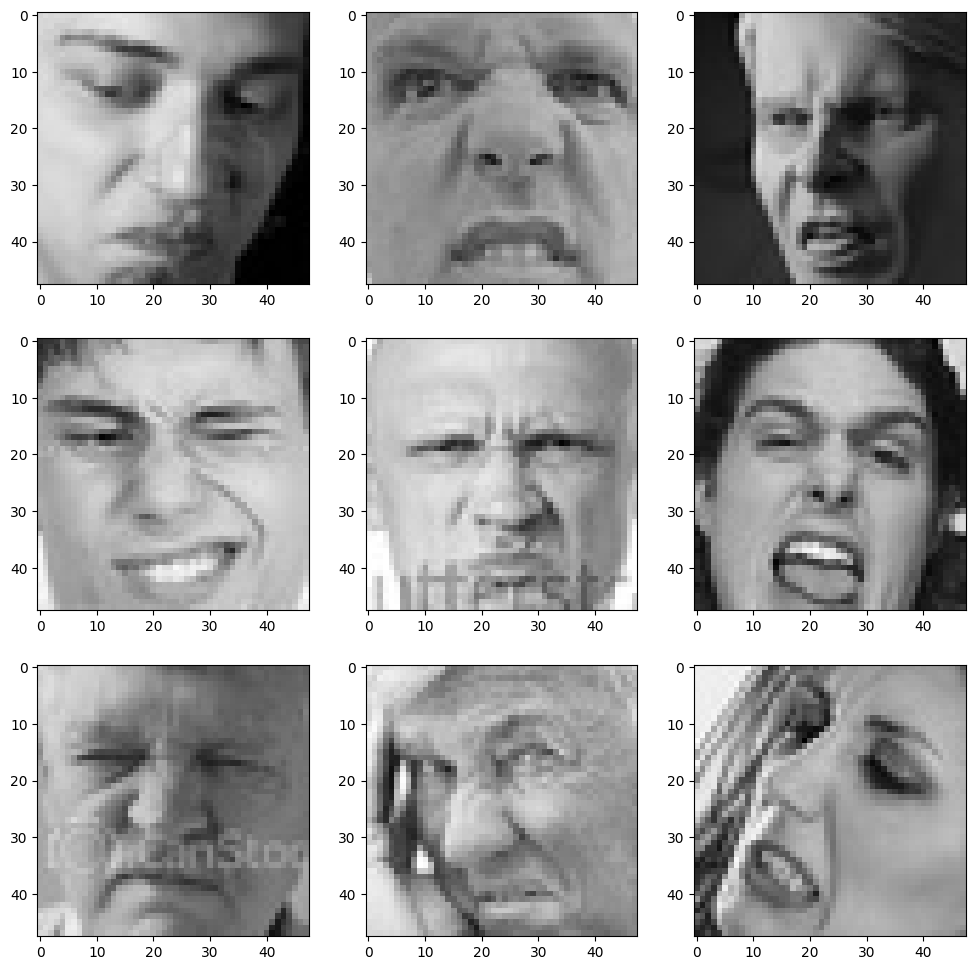

In [ ]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

# Making Training and Validation Data

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))


model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Fitting the Model with Training and Validation Data

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 12

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-9-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/12
225/225 [==============================] - ETA: 0s - loss: 1.6262 - accuracy: 0.3862

225/225 [==============================] - 828s 4s/step - loss: 1.6262 - accuracy: 0.3862 - val_loss: 1.5362 - val_accuracy: 0.4297 - lr: 0.0010
Epoch 2/12
225/225 [==============================] - ETA: 0s - loss: 1.3371 - accuracy: 0.4945

225/225 [==============================] - 806s 4s/step - loss: 1.3371 - accuracy: 0.4945 - val_loss: 1.4329 - val_accuracy: 0.4418 - lr: 0.0010
Epoch 3/12
225/225 [==============================] - ETA: 0s - loss: 1.1943 - accuracy: 0.5508

225/225 [==============================] - 798s 4s/step - loss: 1.1943 - accuracy: 0.5508 - val_loss: 1.5726 - val_accuracy: 0.4040 - lr: 0.0010
Epoch 4/12
225/225 [==============================] - ETA: 0s - loss: 1.0923 - accuracy: 0.5918

225/225 [==============================] - 760s 3s/step - loss: 1.0923 - accuracy: 0.5918 - val_loss: 1.2840 - val_accuracy: 0.5166 - lr: 0.0010
Epoch 5/12
225/225 [==============================] - ETA: 0s - loss: 0.9888 - accuracy: 0.6349

225/225 [==============================] - 796s 4s/step - loss: 0.9888 - accuracy: 0.6349 - val_loss: 1.3770 - val_accuracy: 0.4791 - lr: 0.0010
Epoch 6/12
225/225 [==============================] - ETA: 0s - loss: 0.9110 - accuracy: 0.6643

225/225 [==============================] - 791s 4s/step - loss: 0.9110 - accuracy: 0.6643 - val_loss: 1.2366 - val_accuracy: 0.5442 - lr: 0.0010
Epoch 7/12
225/225 [==============================] - ETA: 0s - loss: 0.8137 - accuracy: 0.7034

225/225 [==============================] - 797s 4s/step - loss: 0.8137 - accuracy: 0.7034 - val_loss: 1.2877 - val_accuracy: 0.5450 - lr: 0.0010
Epoch 8/12
225/225 [==============================] - ETA: 0s - loss: 0.7321 - accuracy: 0.7335

225/225 [==============================] - 797s 4s/step - loss: 0.7321 - accuracy: 0.7335 - val_loss: 1.3336 - val_accuracy: 0.5268 - lr: 0.0010
Epoch 9/12
225/225 [==============================] - ETA: 0s - loss: 0.6425 - accuracy: 0.7694Restoring model weights from the end of the best epoch: 6.



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 795s 4s/step - loss: 0.6425 - accuracy: 0.7694 - val_loss: 1.3049 - val_accuracy: 0.5398 - lr: 0.0010
Epoch 9: early stopping


# Plotting Accuracy & Loss

In [ ]:
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
with open('/content/history.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
model.save('/content/drive/MyDrive/history.pkl')

In [ ]:
print(history)

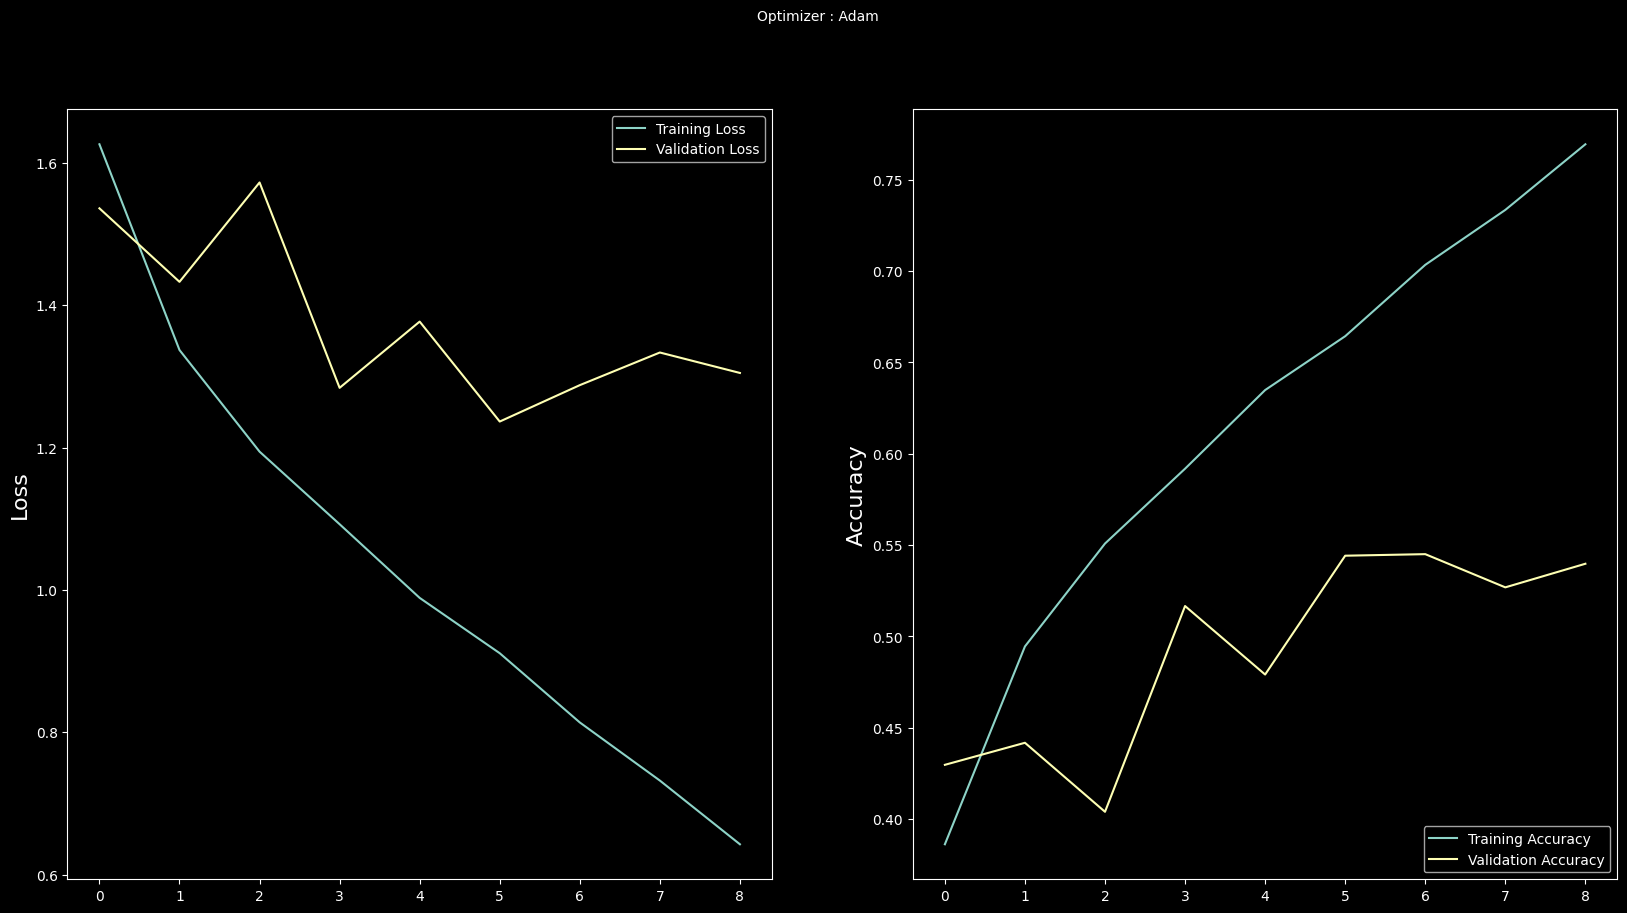

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('model.h5')

